# Центральная предельная теорема своими руками #

Проверим работу ЦПТ для [Распределение хи-квадрат](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82) [(Chi-squared distribution)](https://en.wikipedia.org/wiki/Chi-squared_distribution)

$$ X = \sum^k\limits_{i=1}{Z^2_i} \sim {X^2_k}$$

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt
import random
%matplotlib inline

Мат ождание для распределения:

$$ \mu = 2k $$

Дисперсия:

$$ \sigma^2 = 2k $$

Расчитаем значения для k = 3

In [6]:
k=5

In [7]:
Mu=k
Sigma = sqrt(2*k)

In [8]:
Mu, Sigma

(5, 3.1622776601683795)

## Генерация наборов выборок##

Создадим рспределение

In [9]:
chi2_rv = stats.chi2(k)
chi2_data = chi2_rv.rvs(1000)

Посторим графики

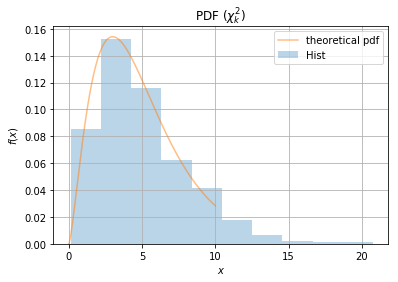

In [10]:
fig, ax = plt.subplots(1, 1)
plt.title('Histogram')
ax.hist(chi2_data, normed=True, alpha=0.3,label='Hist')
x = np.linspace(0, 10, 1000)
ax.plot(x, chi2_rv.pdf(x), label='theoretical pdf',alpha=0.5)
plt.legend()
plt.title("PDF ($\chi^2_k$)")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.grid(True)
plt.show()

### Функция генерации выборок###

Функция расчета среднего

$$ \bar{X}_n = \sum^n\limits_{i=1}{X_i} $$

In [11]:
def mean_chi2(Xi):
    n = len(Xi)
    res=.0
    for x in Xi:
        res = res + x
    return res/n

Функция расчета Сигма

$$ \bar{\sigma} = \sigma /\sqrt n $$

In [12]:
def sigma2_chi2(si,n_):
    return long(si)/sqrt(n_)

In [13]:
def createsets(org_data,n_, count_sub=1000):
    means = []
    for x in range(count_sub):
        sub_data_mean = org_data[np.random.randint(0,len(org_data),n_)]
        means.append(mean_chi2(sub_data_mean))
    return means

In [24]:
ii=1
list_n = (10,)

par_n = 10
means = createsets(chi2_data,par_n)
mu  = mean_chi2(means)
sig = sigma2_chi2(Sigma, par_n)

means


[4.6954584513871973,
 5.5961705054608171,
 4.0816467205689833,
 5.8038733979383608,
 4.2492269558932207,
 3.5114047765096488,
 5.3984433237309775,
 4.3399994530487893,
 4.4089893672140317,
 6.1002742335367923,
 3.943381820868594,
 5.7218085706853312,
 5.2209608104416132,
 5.1613391447763473,
 4.0334836585274916,
 5.9409701284434586,
 7.3349350660014405,
 4.9429626484899369,
 4.2669729219471542,
 5.2061365227762622,
 4.6743332372737125,
 4.7536816123614765,
 5.675496158610601,
 6.0012354049752741,
 5.5938805259484328,
 4.7984291218921387,
 4.618721719308156,
 4.7791804538732139,
 7.795685602419633,
 3.7059214716911533,
 2.8065396051135942,
 6.2548322291769036,
 5.1982023575882037,
 5.1637754561683646,
 4.9959306357604989,
 6.1348824606980132,
 3.8962932143014797,
 4.89533289530128,
 6.7924617248621164,
 4.3269371962011016,
 3.0357205069155198,
 4.5418184250346885,
 4.9317399899324403,
 5.9917939649134366,
 5.5377240158034606,
 4.0220534776958692,
 4.2377656436294941,
 4.8394215944792576

Теоретическое среднее vs приближенное: 5.00 vs 4.94
Теоретическое стандартное откл. vs приближенное: 3.16 vs 0.95


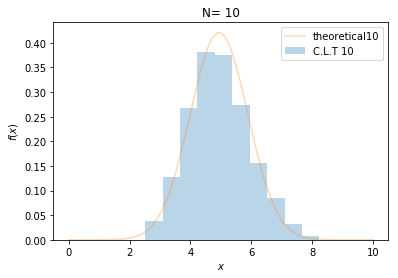

In [27]:
norm_rv = stats.norm(mu,sig)    
print 'Теоретическое среднее vs приближенное: {:.2f} vs {:.2f}'.format(Mu,mu)
print 'Теоретическое стандартное откл. vs приближенное: {:.2f} vs {:.2f}'.format(Sigma,sig)
plt.title ("N= "+str(par_n))
plt.hist(means,normed=True,label='C.L.T '+ str(par_n),alpha=0.3)
plt.plot(x,norm_rv.pdf(x),label='theoretical'+ str(par_n),alpha=0.3)

plt.legend()    
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
ii = ii+1

## Выводы ##

    Основной вывод: Центральная предельная теорема - работает и среднее приближает.
С увеличением числа N увеличивается плотность распределяения выборочных средних с увеличением точности оценки. Среднеквадратичное отклонение уменьшается.